<a href="https://colab.research.google.com/github/Siddartha2003/NLP/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Load data from keras.datasets and perform following computational analysis:-


###(a) Preprocessing of the Data

###(b) Divide data into training and testing data set

###(c) Build the Gated Recurrent Units (GRU) Model

###(d) Training the GRU Model

###(e) Text Generation Using the Trained Model

###(f)  Evaluate Model’s accuracy

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
max_features = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 64
epochs = 1
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = imdb.get_word_index(seed_text)
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in imdb.get_word_index().items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 324ms/step - accuracy: 0.7059 - loss: 0.5410 - val_accuracy: 0.8504 - val_loss: 0.3490
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8510 - loss: 0.3496
Test accuracy: 0.8504400253295898


##2.Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets.

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


def build_gru_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def build_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

gru_model = build_gru_model()
gru_history = gru_model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
gru_test_loss, gru_test_acc = gru_model.evaluate(x_test, y_test)

lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test)

print(f"GRU Test Accuracy: {gru_test_acc:.4f}")
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 499ms/step - accuracy: 0.5965 - loss: 367585624064.0000 - val_accuracy: 0.6890 - val_loss: 0.5948
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 156s 497ms/step - accuracy: 0.7584 - loss: 1281.8088 - val_accuracy: 0.6892 - val_loss: 0.5791
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 501ms/step - accuracy: 0.7818 - loss: 0.4891 - val_accuracy: 0.6928 - val_loss: 0.5735
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6896 - loss: 0.5792
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 454ms/step - accuracy: 0.6849 - loss: 0.5698 - val_accuracy: 0.8524 - val_loss: 0.3614
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 454ms/step - accuracy: 0.8593 - loss: 0.3476 - val_accuracy: 0.8394 - val_loss: 0.3862
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 451ms/step - accuracy: 0.8882 - loss: 0.2794 - val_accuracy: 0.8572 - val_loss: 0.3633
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.8519 - loss: 0.3697
GRU Test Accuracy: 0.6934
LSTM Test Accuracy: 

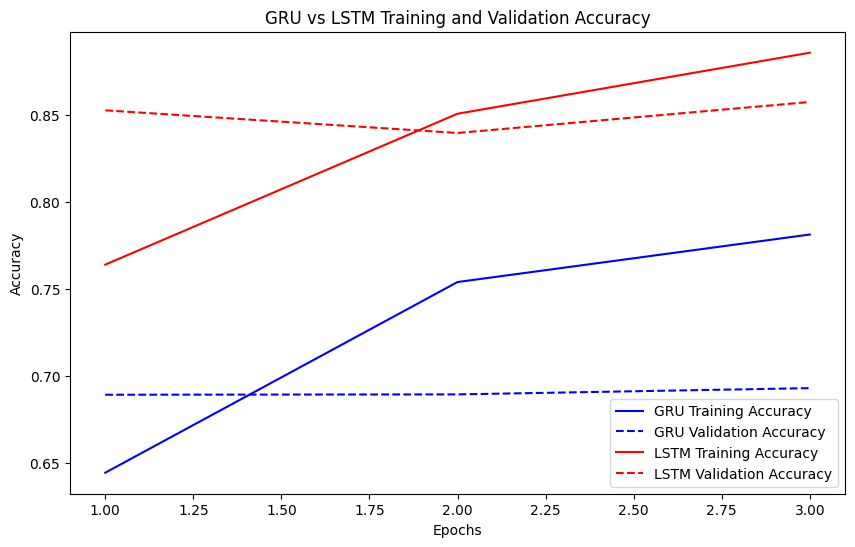

In [8]:
import matplotlib.pyplot as plt
gru_acc = gru_history.history['accuracy']
gru_val_acc = gru_history.history['val_accuracy']
lstm_acc = lstm_history.history['accuracy']
lstm_val_acc = lstm_history.history['val_accuracy']
epochs = range(1, len(gru_acc) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, gru_acc, 'b', label='GRU Training Accuracy')
plt.plot(epochs, gru_val_acc, 'b--', label='GRU Validation Accuracy')
plt.plot(epochs, lstm_acc, 'r', label='LSTM Training Accuracy')
plt.plot(epochs, lstm_val_acc, 'r--', label='LSTM Validation Accuracy')
plt.title('GRU vs LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()